Dataset shape: (1000, 11)
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.964799  -0.066449   0.986768  -0.358079   0.997266   1.181890   
1  -0.916511  -0.566395  -1.008614   0.831617  -1.176962   1.820544   
2  -0.109484  -0.432774  -0.457649   0.793818  -0.268646  -1.836360   
3   1.750412   2.023606   1.688159   0.006800  -1.607661   0.184741   
4  -0.224726  -0.711303  -0.220778   0.117124   1.536061   0.597538   

   Feature_6  Feature_7  Feature_8  Feature_9  Churn  
0  -1.615679  -1.210161  -0.628077   1.227274      0  
1   1.752375  -0.984534   0.363896   0.209470      1  
2   1.239086  -0.246383  -1.058145  -0.297376      1  
3  -2.619427  -0.357445  -1.473127  -0.190039      0  
4   0.348645  -0.939156   0.175915   0.236224      1  

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                 

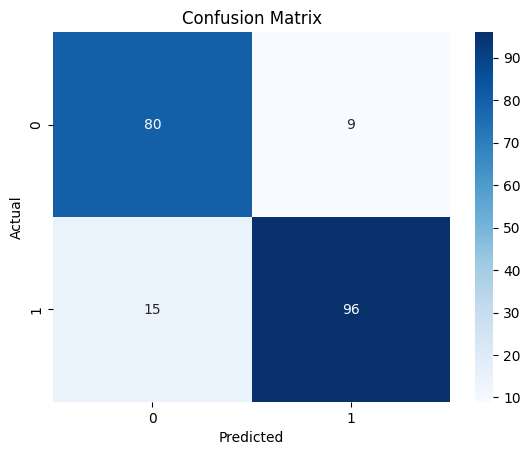

In [1]:
# STEP 1: Install required libraries (run only if needed)
!pip install -q pandas scikit-learn matplotlib seaborn

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# STEP 3: Load demo dataset (replace with your own CSV file if needed)
from sklearn.datasets import make_classification

# Generate synthetic churn-like data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
columns = [f"Feature_{i}" for i in range(X.shape[1])]
data = pd.DataFrame(X, columns=columns)
data['Churn'] = y

# If using your CSV:
# from google.colab import files
# uploaded = files.upload()  # upload your file
# data = pd.read_csv('your_file.csv')

# STEP 4: Preprocess data (simple, since it's synthetic)
print("Dataset shape:", data.shape)
print(data.head())

# STEP 5: Split data
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 7: Evaluate
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
